In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as svm
%matplotlib inline
import pandas as pd
import csv
import numpy as np
from sklearn import preprocessing
import statistics
import sys

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# ds_content= pd.read_csv('/content/drive/MyDrive/steam_games.csv')

In [ ]:
# ds_content.columns

Index(['url', 'types', 'name', 'desc_snippet', 'recent_reviews', 'all_reviews',
       'release_date', 'developer', 'publisher', 'popular_tags',
       'game_details', 'languages', 'achievements', 'genre',
       'game_description', 'mature_content', 'minimum_requirements',
       'recommended_requirements', 'original_price', 'discount_price'],
      dtype='object')

In [85]:
# ds_collab = pd.read_csv('steam-200k.csv')
ds_collab = pd.read_csv('steam_users_purchase_play.csv')

In [86]:
ds_collab.head(20)

,Unnamed: 0,user_id,game,hours,purchase,play
0,0,5250,Alien Swarm,4.9,1,1
1,1,5250,Cities Skylines,144.0,1,1
2,2,5250,Counter-Strike,0.0,1,0
3,3,5250,Counter-Strike Source,0.0,1,0
4,4,5250,Day of Defeat,0.0,1,0
5,5,5250,Deathmatch Classic,0.0,1,0
6,6,5250,Deus Ex Human Revolution,62.0,1,1
7,7,5250,Dota 2,0.2,1,1
8,8,5250,Half-Life,0.0,1,0
9,9,5250,Half-Life 2,0.0,1,0


In [87]:
ds_collab.size

772824

In [ ]:
#Preprocessing

In [88]:
ds_collab = ds_collab[ds_collab['play'] == 1].copy()

In [89]:
ds_collab['status'] = 'play'
ds_collab['name'] = ds_collab['game']
ds_collab = ds_collab.drop(columns=['play','purchase','Unnamed: 0','game'])

In [90]:
ds_collab.columns

Index(['user_id', 'hours', 'status', 'name'], dtype='object')

In [91]:
ds_collab.head(20)

,user_id,hours,status,name
0,5250,4.9,play,Alien Swarm
1,5250,144.0,play,Cities Skylines
6,5250,62.0,play,Deus Ex Human Revolution
7,5250,0.2,play,Dota 2
17,5250,13.6,play,Portal 2
19,5250,0.8,play,Team Fortress 2
21,76767,13.1,play,Age of Empires II HD Edition
22,76767,0.8,play,Alien Swarm
26,76767,24.0,play,Banished
27,76767,22.0,play,Call of Duty Black Ops


In [92]:
hours_played_each_game = pd.DataFrame(index=ds_collab['user_id'].unique(), columns=ds_collab['name'].unique())


In [93]:
hours_played_each_game

,Alien Swarm,Cities Skylines,Deus Ex Human Revolution,Dota 2,Portal 2,Team Fortress 2,Age of Empires II HD Edition,Banished,Call of Duty Black Ops,Call of Duty Black Ops - Multiplayer,...,WTFast Gamers Private Network (GPN),Pink Heaven,Operation Z,The Secret of Tremendous Corporation,Bloodwood Reload,Terrain Test,Electric Highways,Abducted,Pink Hour,SimpleRockets
5250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76767,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86540,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
144736,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
181212,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309434439,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
309554670,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
309626088,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
309824202,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [94]:
hours_played_each_game['The Elder Scrolls V Skyrim'].index.values

array([     5250,     76767,     86540, ..., 309626088, 309824202,
       309903146], dtype=int64)

In [95]:
for i in range(len(ds_collab)):
  user_id = ds_collab.iloc[i]['user_id']
  name = ds_collab.iloc[i]['name']
  hours_played_each_game.loc[user_id,name] = ds_collab.iloc[i]['hours']

In [96]:
hours_played_each_game

,Alien Swarm,Cities Skylines,Deus Ex Human Revolution,Dota 2,Portal 2,Team Fortress 2,Age of Empires II HD Edition,Banished,Call of Duty Black Ops,Call of Duty Black Ops - Multiplayer,...,WTFast Gamers Private Network (GPN),Pink Heaven,Operation Z,The Secret of Tremendous Corporation,Bloodwood Reload,Terrain Test,Electric Highways,Abducted,Pink Hour,SimpleRockets
5250,4.9,144.0,62.0,0.2,13.6,0.8,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76767,0.8,NaN,NaN,NaN,15.0,NaN,13.1,24.0,22.0,12.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86540,NaN,NaN,NaN,NaN,NaN,NaN,0.7,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
144736,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
181212,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309434439,NaN,NaN,NaN,0.8,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
309554670,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
309626088,NaN,NaN,NaN,NaN,NaN,NaN,6.7,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
309824202,NaN,NaN,NaN,0.7,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


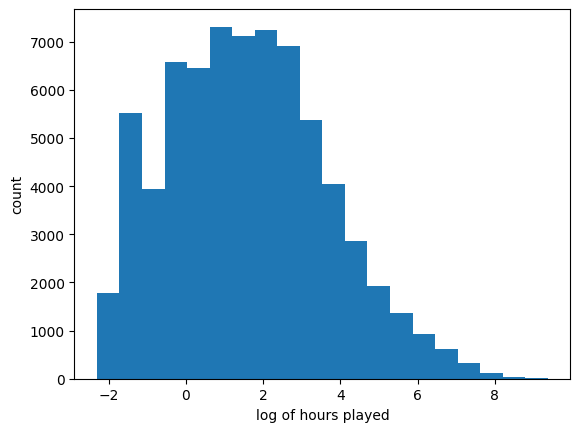

In [98]:
l = hours_played_each_game.values.flatten()
import math
h = []
for i in l:
  if math.isnan(i) == False:
    h.append(i)
plt.hist(np.log(h), bins=20)
plt.xlabel('log of hours played')
plt.ylabel('count')
plt.show()

In [99]:
hours_played_each_game.to_csv('each_game_playtime.csv')

In [100]:
each_item = pd.read_csv('each_game_playtime.csv', index_col=0)

In [101]:
each_item

,Alien Swarm,Cities Skylines,Deus Ex Human Revolution,Dota 2,Portal 2,Team Fortress 2,Age of Empires II HD Edition,Banished,Call of Duty Black Ops,Call of Duty Black Ops - Multiplayer,...,WTFast Gamers Private Network (GPN),Pink Heaven,Operation Z,The Secret of Tremendous Corporation,Bloodwood Reload,Terrain Test,Electric Highways,Abducted,Pink Hour,SimpleRockets
5250,4.9,144.0,62.0,0.2,13.6,0.8,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76767,0.8,NaN,NaN,NaN,15.0,NaN,13.1,24.0,22.0,12.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86540,NaN,NaN,NaN,NaN,NaN,NaN,0.7,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
144736,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
181212,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309434439,NaN,NaN,NaN,0.8,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
309554670,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
309626088,NaN,NaN,NaN,NaN,NaN,NaN,6.7,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
309824202,NaN,NaN,NaN,0.7,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [102]:
each_item_norm = np.log(each_item)
each_item_norm += abs(each_item_norm.min().min())
print(each_item_norm.min().min(), each_item_norm.max().max())
each_item_norm = each_item_norm[(~each_item_norm.isnull()).sum(axis=1) >= 3]
each_item_norm

0.0 11.674533980166641


,Alien Swarm,Cities Skylines,Deus Ex Human Revolution,Dota 2,Portal 2,Team Fortress 2,Age of Empires II HD Edition,Banished,Call of Duty Black Ops,Call of Duty Black Ops - Multiplayer,...,WTFast Gamers Private Network (GPN),Pink Heaven,Operation Z,The Secret of Tremendous Corporation,Bloodwood Reload,Terrain Test,Electric Highways,Abducted,Pink Hour,SimpleRockets
5250,3.891820,7.272398,6.429719,0.693147,4.912655,2.079442,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76767,2.079442,NaN,NaN,NaN,5.010635,NaN,4.875197,5.480639,5.393628,4.828314,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86540,NaN,NaN,NaN,NaN,NaN,NaN,1.945910,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
229911,NaN,NaN,NaN,NaN,NaN,1.386294,NaN,NaN,4.394449,3.332205,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
298950,2.772589,2.995732,5.634790,1.609438,5.141664,9.229162,2.484907,1.791759,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306547522,NaN,NaN,NaN,3.332205,NaN,1.609438,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
306971738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
308695132,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
308760273,NaN,NaN,NaN,NaN,NaN,1.791759,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [103]:
each_item_norm = each_item_norm.fillna(0)

In [104]:
each_item_norm.columns

Index(['Alien Swarm', 'Cities Skylines', 'Deus Ex Human Revolution', 'Dota 2',
       'Portal 2', 'Team Fortress 2', 'Age of Empires II HD Edition',
       'Banished', 'Call of Duty Black Ops',
       'Call of Duty Black Ops - Multiplayer',
       ...
       'WTFast Gamers Private Network (GPN)', 'Pink Heaven', 'Operation Z',
       'The Secret of Tremendous Corporation', 'Bloodwood Reload',
       'Terrain Test', 'Electric Highways', 'Abducted', 'Pink Hour',
       'SimpleRockets'],
      dtype='object', length=3600)

In [105]:
each_item_norm

,Alien Swarm,Cities Skylines,Deus Ex Human Revolution,Dota 2,Portal 2,Team Fortress 2,Age of Empires II HD Edition,Banished,Call of Duty Black Ops,Call of Duty Black Ops - Multiplayer,...,WTFast Gamers Private Network (GPN),Pink Heaven,Operation Z,The Secret of Tremendous Corporation,Bloodwood Reload,Terrain Test,Electric Highways,Abducted,Pink Hour,SimpleRockets
5250,3.891820,7.272398,6.429719,0.693147,4.912655,2.079442,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
76767,2.079442,0.000000,0.000000,0.000000,5.010635,0.000000,4.875197,5.480639,5.393628,4.828314,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
86540,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.945910,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
229911,0.000000,0.000000,0.000000,0.000000,0.000000,1.386294,0.000000,0.000000,4.394449,3.332205,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
298950,2.772589,2.995732,5.634790,1.609438,5.141664,9.229162,2.484907,1.791759,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306547522,0.000000,0.000000,0.000000,3.332205,0.000000,1.609438,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
306971738,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
308695132,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
308760273,0.000000,0.000000,0.000000,0.000000,0.000000,1.791759,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [106]:
slice_ds = each_item_norm[0:200]
slice_ds

,Alien Swarm,Cities Skylines,Deus Ex Human Revolution,Dota 2,Portal 2,Team Fortress 2,Age of Empires II HD Edition,Banished,Call of Duty Black Ops,Call of Duty Black Ops - Multiplayer,...,WTFast Gamers Private Network (GPN),Pink Heaven,Operation Z,The Secret of Tremendous Corporation,Bloodwood Reload,Terrain Test,Electric Highways,Abducted,Pink Hour,SimpleRockets
5250,3.891820,7.272398,6.429719,0.693147,4.912655,2.079442,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
76767,2.079442,0.000000,0.000000,0.000000,5.010635,0.000000,4.875197,5.480639,5.393628,4.828314,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
86540,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.945910,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
229911,0.000000,0.000000,0.000000,0.000000,0.000000,1.386294,0.000000,0.000000,4.394449,3.332205,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
298950,2.772589,2.995732,5.634790,1.609438,5.141664,9.229162,2.484907,1.791759,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20366600,0.000000,0.000000,0.000000,0.000000,0.000000,5.214936,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20464587,1.098612,0.000000,0.000000,0.000000,0.000000,2.197225,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20566124,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20704366,0.000000,5.634790,0.000000,0.000000,4.890349,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [107]:
np_df = each_item_norm.to_numpy()

In [108]:
user_id = each_item_norm.index.to_numpy()

In [109]:
np_df

array([[3.8918203 , 7.27239839, 6.42971948, ..., 0.        , 0.        ,
        0.        ],
       [2.07944154, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [110]:
feature_arr = []
for i in np_df:
  d = list(i[0:len(i)-1])
  p = [int(j) for j in d]
  feature_arr.append(p)

In [111]:
user_id

array([     5250,     76767,     86540, ..., 308695132, 308760273,
       309404240], dtype=int64)

In [112]:
from sklearn.metrics import mean_squared_error
class ExplicitMF:
    """
    Train a matrix factorization model using Alternating Least Squares
    to predict empty entries in a matrix
    
    Parameters
    ----------
    n_iters : int
        number of iterations to train the algorithm
        
    n_factors : int
        number of latent factors to use in matrix 
        factorization model, some machine-learning libraries
        denote this as rank
        
    reg : float
        regularization term for item/user latent factors,
        since lambda is a keyword in python we use reg instead
    """

    def __init__(self, n_iters, n_factors, reg):
        self.reg = reg
        self.n_iters = n_iters
        self.n_factors = n_factors  
        
    def fit(self, train):
        """
        pass in training and testing at the same time to record
        model convergence, assuming both dataset is in the form
        of User x Item matrix with cells as ratings
        """
        self.n_user, self.n_item = train.shape
        self.user_factors = np.random.random((self.n_user, self.n_factors))
        self.item_factors = np.random.random((self.n_item, self.n_factors))

        self.train_mse_record = []   
        for _ in range(self.n_iters):
            self.user_factors = self._als_step(train, self.user_factors, self.item_factors)
            self.item_factors = self._als_step(train.T, self.item_factors, self.user_factors) 
            predictions = self.predict()
            train_mse = self.compute_mse(train, predictions)
            self.train_mse_record.append(train_mse)
        
        return self    
    
    def _als_step(self, ratings, solve_vecs, fixed_vecs):
        """
        when updating the user matrix,
        the item matrix is the fixed vector and vice versa
        """
        A = fixed_vecs.T.dot(fixed_vecs) + np.eye(self.n_factors) * self.reg
        b = ratings.dot(fixed_vecs)
        A_inv = np.linalg.inv(A)
        solve_vecs = b.dot(A_inv)
        return solve_vecs
    
    def predict(self):
        """predict ratings for every user and item"""
        pred = self.user_factors.dot(self.item_factors.T)
        return pred
    
    @staticmethod
    def compute_mse(y_true, y_pred):
        """ignore zero terms prior to comparing the mse"""
        mask = np.nonzero(y_true)
        mse = mean_squared_error(y_true[mask], y_pred[mask])
        return mse

In [113]:
def plot_learning_curve(model):
    """visualize the training/testing loss"""
    linewidth = 3
    plt.plot(model.train_mse_record, label = 'Train', linewidth = linewidth)
    plt.xlabel('iterations')
    plt.ylabel('MSE')
    plt.legend(loc = 'best')
    plt.show()

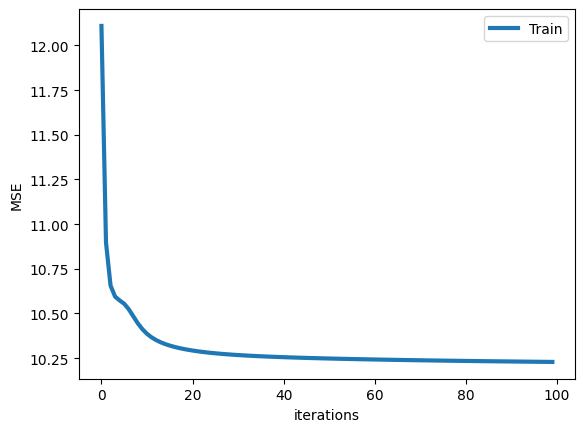

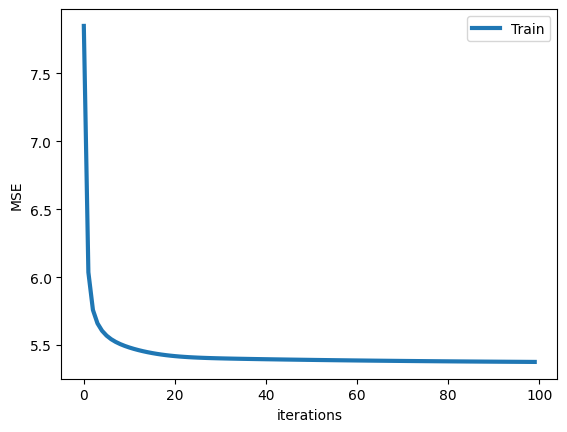

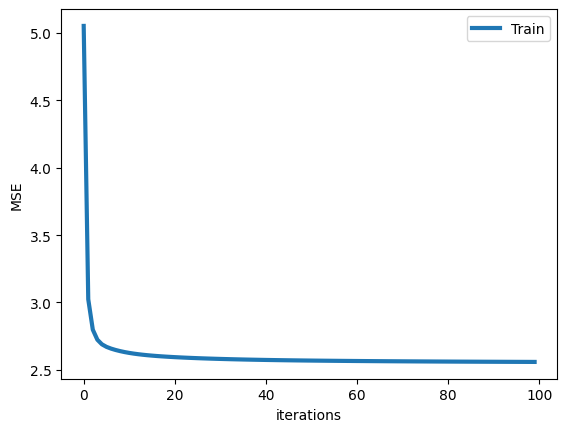

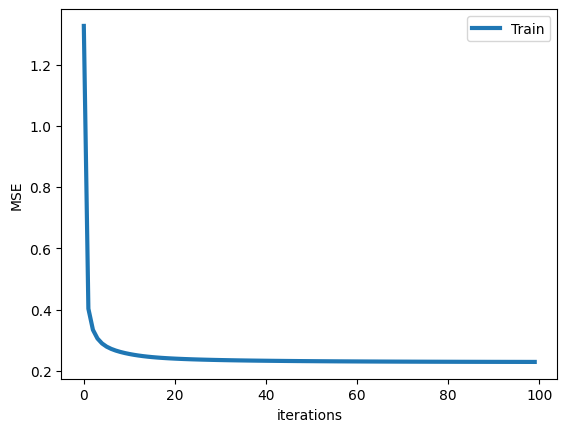

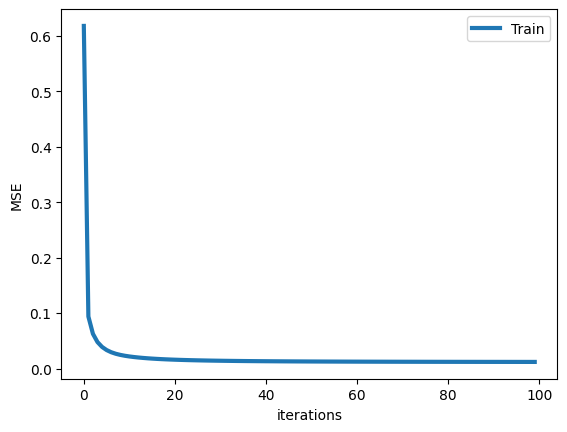

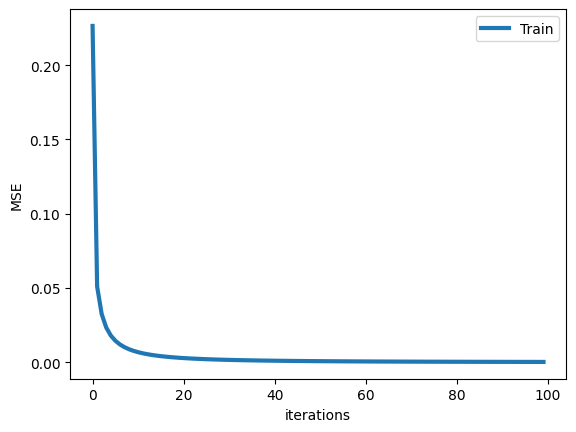

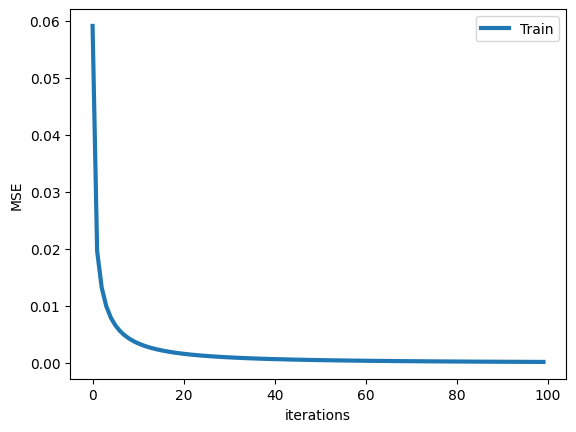

In [114]:
als_min_history = []
for i in [5,20,40,100,150,250,500]:
  als = ExplicitMF(n_iters = 100, n_factors = i, reg = 0.01)
  als.fit(slice_ds.to_numpy())
  plot_learning_curve(als)
  als_min_history.append(min(als.train_mse_record))

Text(0, 0.5, 'MSE')

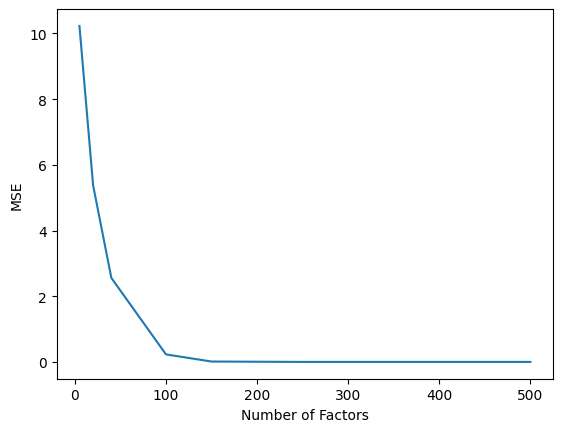

In [115]:
plt.plot([5,20,40,100,150,250,500], als_min_history)
plt.xlabel('Number of Factors')
plt.ylabel('MSE')

In [116]:
md = ExplicitMF(n_iters = 100, n_factors = 25, reg = 0.01)
md.fit(slice_ds.to_numpy())

In [117]:
lf_prod = np.matmul(md.user_factors, md.item_factors.T)

In [118]:
ubyi_mf = pd.DataFrame(lf_prod, index=slice_ds.index.values, columns=slice_ds.columns.values)
ubyi_mf

,Alien Swarm,Cities Skylines,Deus Ex Human Revolution,Dota 2,Portal 2,Team Fortress 2,Age of Empires II HD Edition,Banished,Call of Duty Black Ops,Call of Duty Black Ops - Multiplayer,...,WTFast Gamers Private Network (GPN),Pink Heaven,Operation Z,The Secret of Tremendous Corporation,Bloodwood Reload,Terrain Test,Electric Highways,Abducted,Pink Hour,SimpleRockets
5250,0.350993,0.620968,0.667453,0.658485,1.479957,0.965438,0.247285,0.006938,0.078984,0.098243,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
76767,-0.074109,-0.250225,0.203596,1.350678,1.590829,1.159448,0.334529,0.799612,3.606889,4.009536,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
86540,0.380118,0.215233,0.572062,0.730764,0.423973,1.914253,0.163470,0.404354,0.158893,0.364208,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
229911,-0.187923,-0.192462,-0.028086,0.976227,0.543806,1.489393,-0.162867,0.638630,2.618738,2.961592,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
298950,3.169635,2.256045,5.862432,1.925953,6.785349,9.901294,1.829925,2.270354,0.037798,0.435093,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20366600,0.761462,0.005134,0.093549,0.128636,0.508933,3.187119,0.301961,0.015226,0.473069,0.657992,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20464587,0.484649,-0.395291,0.113514,0.497839,0.631062,1.552105,0.369306,-0.022248,-0.021837,0.025578,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20566124,0.203614,-0.167959,0.004190,-0.084349,0.874099,0.181749,0.109393,0.125660,0.188994,0.105444,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20704366,0.017969,0.573105,0.857242,0.669931,4.483702,0.080497,0.160892,-0.092537,0.074656,0.058186,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [120]:
# ubyi_mf.loc[151603712].values
ubyi_mf.loc[5250].values

array([0.35099325, 0.62096797, 0.66745314, ..., 0.        , 0.        ,
       0.        ])

In [121]:
#construct user correlation matrix
user_corr = pd.DataFrame(index=ubyi_mf.index.values, 
                         columns=ubyi_mf.index.values)

In [122]:
i = 0
for user1 in user_corr.index.values:
  #progress indicator
  i+=1
  # print(i)
  # print("for-",user1)
  for user2 in user_corr.columns.values:
    if user1 == user2:
      continue
    # print()
    a = ubyi_mf.loc[user1].values
    b = ubyi_mf.loc[user2].values

    corr = np.corrcoef(a,b)[0,1]
    user_corr.loc[user1,user2] = corr
    user_corr.loc[user2,user1] = corr

In [123]:
user_corr

,5250,76767,86540,229911,298950,547685,554278,561758,622362,714122,...,19616379,19668647,19696244,20200395,20207081,20366600,20464587,20566124,20704366,20772968
5250,NaN,0.129053,0.375597,0.061037,0.54409,0.16376,0.199632,0.434973,0.252099,0.016688,...,0.220391,0.297668,0.326808,0.272681,0.18387,0.299266,0.172444,0.176095,0.535158,0.405174
76767,0.129053,NaN,0.066414,0.874074,0.117111,0.598628,0.647457,0.565591,0.512945,0.694531,...,0.088842,0.34171,0.318842,0.130516,0.29345,0.469792,0.266353,0.457163,0.098413,0.172498
86540,0.375597,0.066414,NaN,0.063478,0.549299,-0.01647,0.116623,0.35691,0.107697,-0.009171,...,0.130443,0.326092,0.378302,0.767518,0.040683,0.484222,0.08341,-0.012776,0.257144,0.476369
229911,0.061037,0.874074,0.063478,NaN,-0.018822,0.46385,0.420727,0.553114,0.518133,0.568739,...,0.334805,0.099718,0.279763,0.124408,0.245235,0.324053,0.133756,0.425356,0.265708,0.0137
298950,0.54409,0.117111,0.549299,-0.018822,NaN,0.23498,0.115673,0.192948,0.296212,-0.0305,...,-0.085972,0.195077,0.536693,0.473765,0.106447,0.337792,0.195154,-0.089923,0.180437,0.208821
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20366600,0.299266,0.469792,0.484222,0.324053,0.337792,0.644344,0.766369,0.245021,0.608459,0.70296,...,0.096905,0.499893,0.528599,0.626411,0.258221,NaN,0.499861,0.502087,0.058188,0.498488
20464587,0.172444,0.266353,0.08341,0.133756,0.195154,0.20875,0.441149,0.089957,0.180025,0.463247,...,0.091901,0.186886,0.210964,0.396163,0.103571,0.499861,NaN,0.552116,-0.031904,0.287381
20566124,0.176095,0.457163,-0.012776,0.425356,-0.089923,0.315476,0.75397,0.320838,0.138742,0.70438,...,0.662417,0.166238,0.332887,0.179578,0.040475,0.502087,0.552116,NaN,0.512977,0.325063
20704366,0.535158,0.098413,0.257144,0.265708,0.180437,-0.05906,0.203511,0.534974,-0.048416,0.025073,...,0.80976,-0.007378,0.42903,0.191056,-0.02705,0.058188,-0.031904,0.512977,NaN,0.268251


In [124]:
# m = list(user_corr.loc[151603712].values)
# m.sort()
# m = m[::-1]
# # d = user_corr.loc[151603712][for i in list(user_corr.loc[151603712].values): in m]
# d = list(user_corr.loc[151603712].values)
# d
# # print(m)
def similar_set(user):
    max = list(user_corr.loc[user].values)
    max.sort()
    max = max[::-1]
    d = user_corr.loc[user][user_corr.loc[user].values > max[5]].index.values
    print("Users similar with -",user," are ",d)
    


In [125]:
# similar_set(151603712)
# m = list(ubyi_mf.loc[151603712].values)
# m.sort()
# m = m[::-1]
# # m
# g = ubyi_mf.loc[151603712][ubyi_mf.loc[151603712].values > m[5]].index.values
# g
def top_game(user):
    m = list(ubyi_mf.loc[user].values)
    m.sort()
    m = m[::-1]
    # m
    g = list(ubyi_mf.loc[user][ubyi_mf.loc[user].values > m[5]].index.values)
    return g
def top_game_rec(user_list):
    h = []
    for i in user_list:
        d = set(h).union(set(top_game(i)))
        h = list(d)
    if len(h) >= 20:
        return h[0:20]
    return h
def recommend_game_20(user):
    max = list(user_corr.loc[user].values)
    max.sort()
    max = max[::-1]
    d = user_corr.loc[user][user_corr.loc[user].values > max[5]].index.values
    return top_game_rec(d)
    # print("Users similar with -",user," are ",d)

In [126]:
user = 5250
print("recommendation for user-",user,recommend_game_20(user))

recommendation for user- 5250 ['Left 4 Dead', 'Counter-Strike Global Offensive', 'Portal 2', 'The Elder Scrolls V Skyrim', 'Borderlands 2', "Sid Meier's Civilization V", 'Left 4 Dead 2', 'Portal', 'Counter-Strike Source', 'Borderlands', 'Dota 2', 'Half-Life 2', 'Team Fortress 2']


C:\Users\DELL\AppData\Local\Temp\ipykernel_7220\1260508121.py:27: RuntimeWarning: invalid value encountered in greater
  d = user_corr.loc[user][user_corr.loc[user].values > max[5]].index.values


In [127]:
ds_total = pd.read_csv('steam-200k.csv')
ds_total

,user_id,name,status,hours
0,151603712,The Elder Scrolls V Skyrim,purchase,1.0
1,151603712,The Elder Scrolls V Skyrim,play,273.0
2,151603712,Fallout 4,purchase,1.0
3,151603712,Fallout 4,play,87.0
4,151603712,Spore,purchase,1.0
...,...,...,...,...
199995,128470551,Titan Souls,play,1.5
199996,128470551,Grand Theft Auto Vice City,purchase,1.0
199997,128470551,Grand Theft Auto Vice City,play,1.5
199998,128470551,RUSH,purchase,1.0


In [132]:
m_l = recommend_game_20(user)
m_l

C:\Users\DELL\AppData\Local\Temp\ipykernel_7220\1260508121.py:27: RuntimeWarning: invalid value encountered in greater
  d = user_corr.loc[user][user_corr.loc[user].values > max[5]].index.values


['Left 4 Dead',
 'Counter-Strike Global Offensive',
 'Portal 2',
 'The Elder Scrolls V Skyrim',
 'Borderlands 2',
 "Sid Meier's Civilization V",
 'Left 4 Dead 2',
 'Portal',
 'Counter-Strike Source',
 'Borderlands',
 'Dota 2',
 'Half-Life 2',
 'Team Fortress 2']

In [130]:
l = set([])
for i in range(len(ds_total['user_id'])):
    if ds_total['user_id'][i] == user:
        l.add(ds_total['name'][i])
        # print(ds_total['name'][i])
    # print(i)
    # break

print(list(l))

['Deus Ex Human Revolution', 'Portal 2', 'Half-Life 2', 'Half-Life 2 Deathmatch', 'Cities Skylines', 'Team Fortress 2', 'Half-Life Opposing Force', 'Deathmatch Classic', 'Counter-Strike Source', 'Half-Life Blue Shift', 'Half-Life', 'Half-Life 2 Episode One', 'Alien Swarm', 'Portal', 'Half-Life 2 Lost Coast', 'Ricochet', 'Dota 2', 'Team Fortress Classic', 'Counter-Strike', 'Half-Life 2 Episode Two', 'Day of Defeat']


In [136]:
game_in_both = []
game_only_recomm = []
for i in m_l:
    if i in l:
        game_in_both.append(i)
    else:
        game_only_recomm.append(i)
print(game_in_both)
print("new games recommended-",game_only_recomm)

['Portal 2', 'Portal', 'Counter-Strike Source', 'Dota 2', 'Half-Life 2', 'Team Fortress 2']
new games recommended- ['Left 4 Dead', 'Counter-Strike Global Offensive', 'The Elder Scrolls V Skyrim', 'Borderlands 2', "Sid Meier's Civilization V", 'Left 4 Dead 2', 'Borderlands']
